# Ayudantia T5b

Importamos las librerias

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox

## Mision 01

En primer lugar obtenemos la red de la comuna de Macul con todas las vias existentes posibles:

In [2]:
red_macul = ox.graph.graph_from_place('Macul, Chile', network_type = 'all_private')

Ploteamos

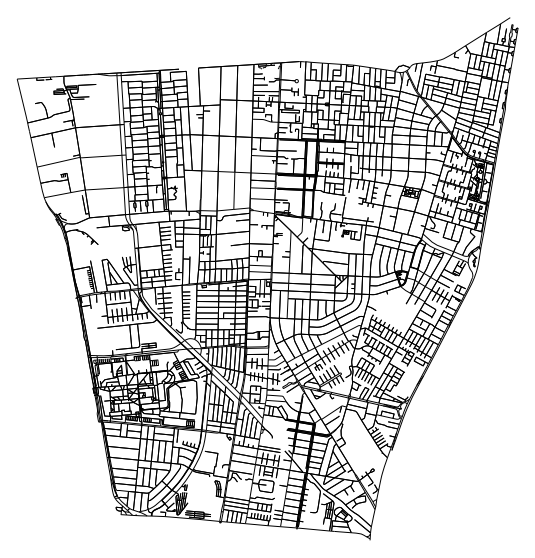

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [6]:
ox.plot_graph(red_macul, figsize = (10,10), bgcolor = 'w', edge_color = 'black', node_alpha = 0)

Efectivamente es Macul, comuna donde se encuentra el campus y esta delimitada por V.Mackena, Rodrigo de Araya, Departamental y Vespucio

Ahora buscamos los puntos extremos con google maps

In [4]:
NO=(-33.470984, -70.577627)
SP=(-33.507677, -70.613652)

Obtenemos los nodos cercanos

In [7]:
nodo_NO = ox.get_nearest_node(red_macul, NO)
nodo_SP = ox.get_nearest_node(red_macul, SP)

c:\users\matías\appdata\local\programs\python\python39\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
c:\users\matías\appdata\local\programs\python\python39\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


Y ya con los nodos la ruta y el largo de la ruta

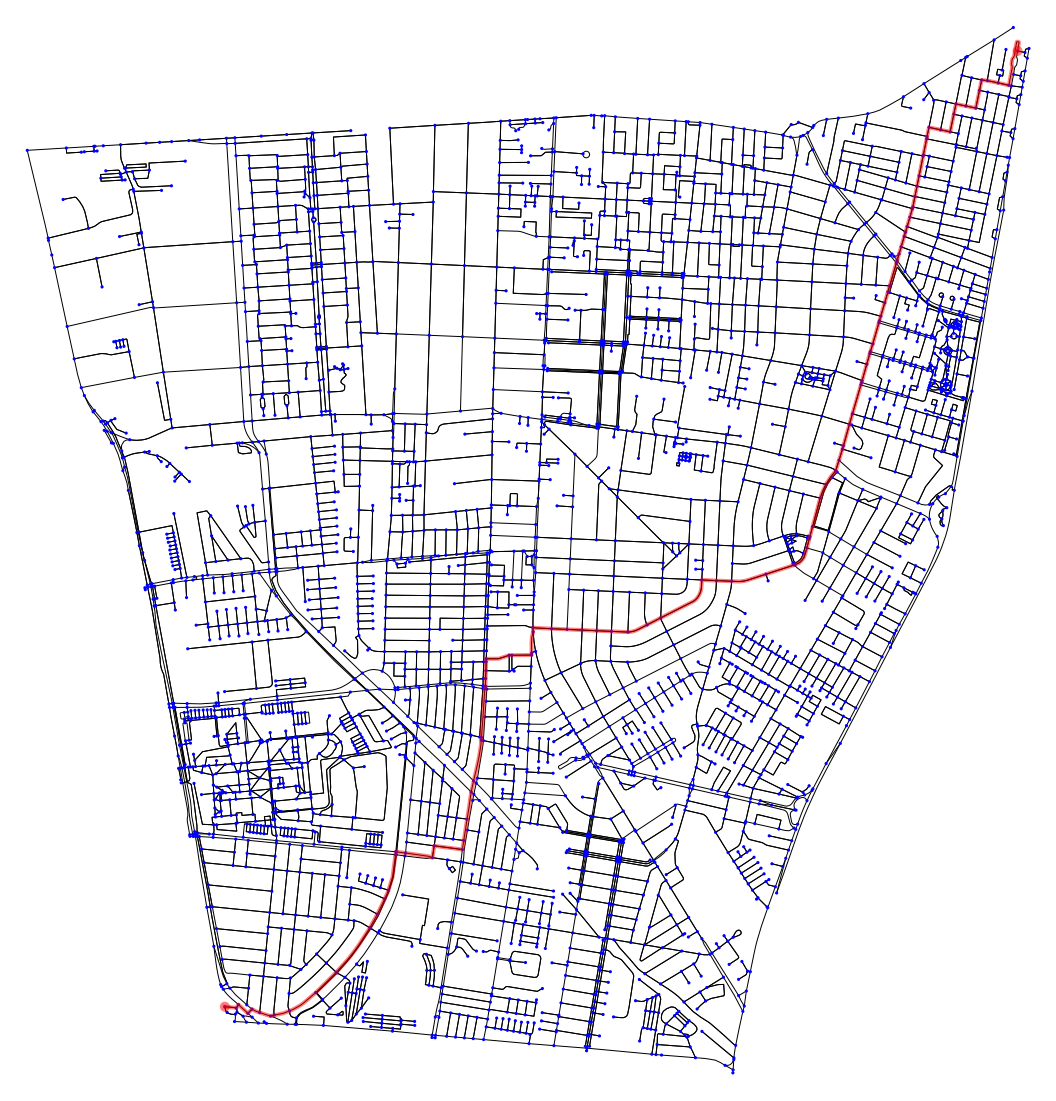

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot:>)

In [8]:
ruta_minima = nx.shortest_path(red_macul, nodo_NO, nodo_SP, weight = 'length')
ox.plot_graph_route(red_macul, ruta_minima, node_size = 10, figsize=(20,20), bgcolor = 'w', node_color = 'blue', edge_color = 'black')

In [10]:
largo = nx.shortest_path_length(red_macul, nodo_NO, nodo_SP, weight = 'length')
print(f'el largo de la ruta es {largo}')

el largo de la ruta es 6571.171999999999


## Mision 2

Cargamos los datos

In [11]:
distritos = gpd.read_file('data/Distritos Censales/Distritos Censales RM.shp')
area_urbana = gpd.read_file('data/Areas Urbanas/areas_urbanas.shp')

Revisamos

In [12]:
distritos.head(2)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."


In [13]:
area_urbana.head(2)

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."


Ploteamos

<AxesSubplot:>

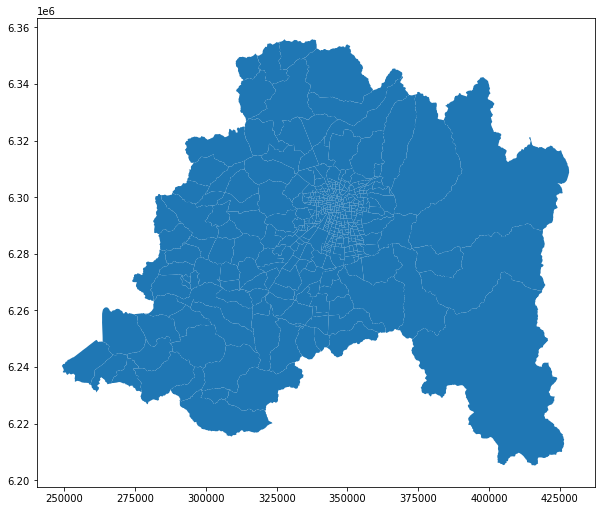

In [14]:
distritos.plot(figsize=(10,10))

Y definimos santiago_urbano, el cual tambien ploteamos

<AxesSubplot:>

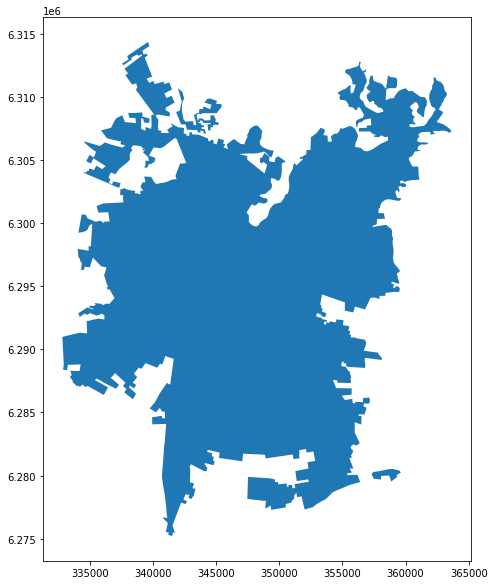

In [16]:
santiago_urbano = area_urbana.loc[area_urbana['NOMBRE']=='Santiago']
santiago_urbano.plot(figsize=(10,10))

Ahora que tenemos nuestros datos, revisamos nuestras proyecciones

In [17]:
distritos.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
santiago_urbano.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Cambiamos la proyeccion de coordenadas a grados, para poder trabajar con Open street map

In [19]:
distritos.to_crs("EPSG:4326", inplace=True)

In [20]:
santiago_urbano.to_crs("EPSG:4326", inplace=True)

c:\users\matías\appdata\local\programs\python\python39\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Y realizo un Overlay para obtener los distritos que se encuentran sobre el santiago urbano

In [21]:
distritos_urbanos = gpd.overlay(distritos, santiago_urbano, how='intersection')

<AxesSubplot:>

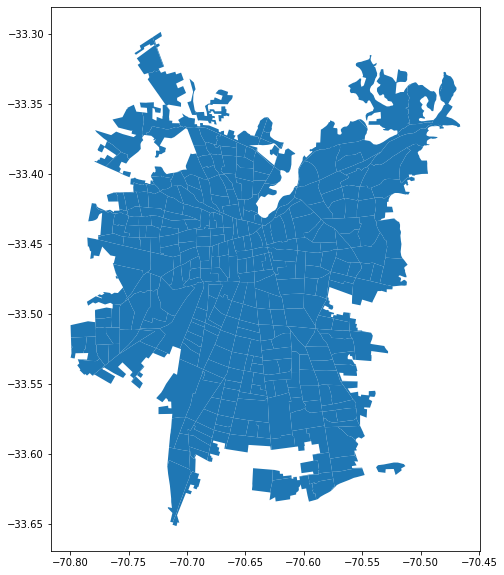

In [22]:
distritos_urbanos.plot(figsize=(10,10))

Ahora para obtener las comunas, junto los distritos que compartan comuna ('NOM_COM')

In [23]:
distritos_urbanos.head(2)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,365.0,3412.0,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,228.0,2741.0,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.65785 -33.43161, -70.65698 -33.4..."


In [24]:
comunas_urbanas=distritos_urbanos.dissolve(by="NOM_COM")

In [25]:
comunas_urbanas.head(2)

,geometry,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area
NOM_COM,,,,,,,,,,,,,,,,,,,,
Cerrillos,"POLYGON ((-70.69617 -33.47940, -70.69492 -33.4...",Región Metropolitana De Santiago,131,Santiago,13102,Cerrillos,1310201.0,71.0,675.0,835.0,494.0,69.0,2144.0,8062397.85,2.66,2.58,Santiago,Ciudad,427491.444262,5.821041e+08
Cerro Navia,"POLYGON ((-70.72047 -33.43090, -70.72053 -33.4...",Región Metropolitana De Santiago,131,Santiago,13103,Cerro Navia,1310301.0,765.0,3370.0,1674.0,319.0,13.0,6141.0,1782987.73,34.44,2.89,Santiago,Ciudad,427491.444262,5.821041e+08


<AxesSubplot:>

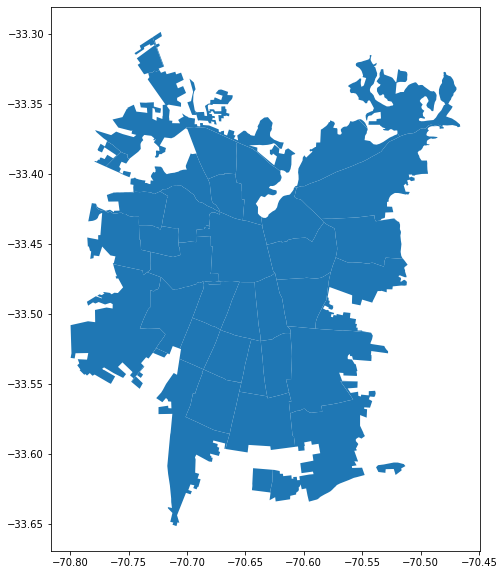

In [26]:
comunas_urbanas.plot(figsize=(10,10))

Y obtengo el centroide de cada comuna

In [27]:
comunas_urbanas["Centroides"] = comunas_urbanas.geometry.centroid

<ipython-input-27-ecef535918b0>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  comunas_urbanas["Centroides"] = comunas_urbanas.geometry.centroid


Y ploteamos

<AxesSubplot:>

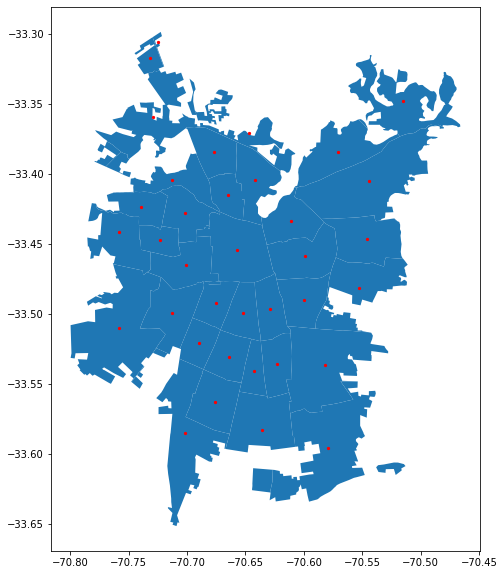

In [28]:
ax=comunas_urbanas.plot(figsize=(10,10))
comunas_urbanas['Centroides'].plot(ax=ax, figsize = (10,10), color = 'red', markersize = 5)

In [29]:
comunas_urbanas.head(2)

,geometry,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_DIS,CODIGO,E,D,C3,...,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,Centroides
NOM_COM,,,,,,,,,,,,,,,,,,,,,
Cerrillos,"POLYGON ((-70.69617 -33.47940, -70.69492 -33.4...",Región Metropolitana De Santiago,131,Santiago,13102,Cerrillos,1310201.0,71.0,675.0,835.0,...,69.0,2144.0,8062397.85,2.66,2.58,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.71262 -33.49889)
Cerro Navia,"POLYGON ((-70.72047 -33.43090, -70.72053 -33.4...",Región Metropolitana De Santiago,131,Santiago,13103,Cerro Navia,1310301.0,765.0,3370.0,1674.0,...,13.0,6141.0,1782987.73,34.44,2.89,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.73928 -33.42294)


Obtengo el valor x e y del centroide

In [30]:
comunas_urbanas['x_centroide'] = comunas_urbanas['Centroides'].apply(lambda x: x.x)
comunas_urbanas['y_centroide'] = comunas_urbanas['Centroides'].apply(lambda x: x.y)

Encuentro los 4 puntos extremos

In [31]:
mas_oeste = comunas_urbanas['x_centroide'].min()
mas_este = comunas_urbanas['x_centroide'].max()
mas_sur  =  comunas_urbanas['y_centroide'].min()
mas_norte = comunas_urbanas['y_centroide'].max()

Y obtengo las comunas que se encuentran en los extremos

In [32]:
comuna_mas_este = comunas_urbanas[comunas_urbanas['x_centroide'] == mas_este]
comuna_mas_oeste = comunas_urbanas[comunas_urbanas['x_centroide'] == mas_oeste]
comuna_mas_sur = comunas_urbanas[comunas_urbanas['y_centroide'] == mas_sur]
comuna_mas_norte = comunas_urbanas[comunas_urbanas['y_centroide'] == mas_norte]

Revisamos que comuna es y defino la tupla de cada uno de los centroides extremos

In [34]:
comuna_mas_este.head()

,geometry,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,Centroides,x_centroide,y_centroide
NOM_COM,,,,,,,,,,,,,,,,,,,,,
Lo Barnechea,"MULTIPOLYGON (((-70.54541 -33.36719, -70.54779...",Región Metropolitana De Santiago,131,Santiago,13115,La Dehesa,1311501.0,78.0,500.0,2444.0,...,130242983.0,0.5,1.56,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.51523 -33.34738),-70.515232,-33.347385


In [40]:
centroide_este=(-70.51523, -33.34738)

In [35]:
comuna_mas_oeste.head()

,geometry,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,Centroides,x_centroide,y_centroide
NOM_COM,,,,,,,,,,,,,,,,,,,,,
Maipú,"MULTIPOLYGON (((-70.72652 -33.52408, -70.72901...",Región Metropolitana De Santiago,131,Santiago,13119,Cinco de Abril,1311901.0,61.0,996.0,1568.0,...,2248291.01,20.54,6.1,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.75853 -33.50992),-70.758533,-33.50992


In [46]:
centroide_oeste=(-70.75853, -33.50992)

In [37]:
comuna_mas_sur.head()

,geometry,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,Centroides,x_centroide,y_centroide
NOM_COM,,,,,,,,,,,,,,,,,,,,,
Puente Alto,"MULTIPOLYGON (((-70.57614 -33.62559, -70.57705...",Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,1320101.0,443.0,2341.0,1634.0,...,2534620.09,20.29,4.87,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.57937 -33.59516),-70.579367,-33.595161


In [42]:
centroide_sur=(-70.57937, -33.59516)

In [38]:
comuna_mas_norte.head()

,geometry,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,Centroides,x_centroide,y_centroide
NOM_COM,,,,,,,,,,,,,,,,,,,,,
Colina,"POLYGON ((-70.72009 -33.32305, -70.72133 -33.3...",Región Metropolitana De Santiago,133,Chacabuco,13301,Algarrobal,1330103.0,286.0,656.0,746.0,...,39793208.0,0.53,0.79,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.72505 -33.30543),-70.725049,-33.305434


In [43]:
centroide_norte=(-70.72505, -33.30543)

Creo la red de santiago 

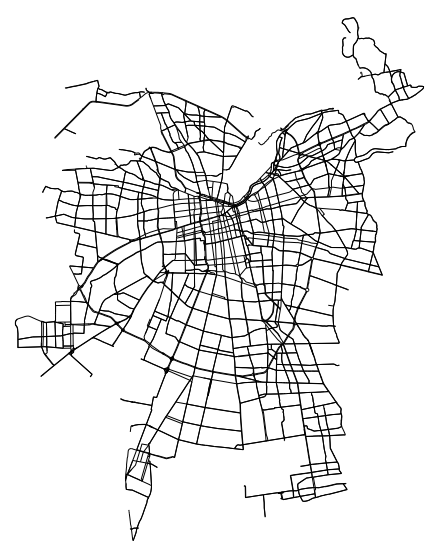

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [39]:
red_santiago = ox.graph.graph_from_polygon(santiago_urbano.geometry.item(), custom_filter = '["highway"~"primary|secondary"]')
ox.plot_graph(red_santiago, figsize = (10,10), bgcolor = 'w', edge_color = 'black', node_alpha = 0)

Y la guardo para poder utilizarla despues

In [44]:
ox.save_graph_shapefile(red_santiago)

c:\users\matías\appdata\local\programs\python\python39\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


Encuentro los nodos de la red mas cercanos a cada uno de los centroides

In [47]:
nodo_E = ox.distance.nearest_nodes(red_santiago, centroide_este[0], centroide_este[1])
nodo_O = ox.distance.nearest_nodes(red_santiago, centroide_oeste[0], centroide_oeste[1])
nodo_N = ox.distance.nearest_nodes(red_santiago, centroide_norte[0], centroide_norte[1])
nodo_S = ox.distance.nearest_nodes(red_santiago, centroide_sur[0], centroide_sur[1])

Obtengo la ruta y la distacia de cada uno de los posibles para O-D (utilice un unico sentido)

In [48]:
def get_path_and_distance(red, origen, destino):
    ruta = nx.shortest_path(red, origen, destino, weight="lenght")
    distancia = nx.shortest_path_length(red, origen, destino, weight="length")
    return ruta, distancia

In [49]:
rutas_distancias = [
    get_path_and_distance(red_santiago, nodo_E, nodo_O),
    get_path_and_distance(red_santiago, nodo_E, nodo_S),
    get_path_and_distance(red_santiago, nodo_E, nodo_N),
    get_path_and_distance(red_santiago, nodo_O, nodo_S),
    get_path_and_distance(red_santiago, nodo_O, nodo_N),
    get_path_and_distance(red_santiago, nodo_S, nodo_N),
]

Reviso las distancias

In [50]:
for i in range(len(rutas_distancias)):
    print(rutas_distancias[i][1])

32413.893
32436.602000000014
32275.39
22616.75700000001
27760.72
34979.574


En este caso, facilmente se puede ver que conviene conectar el nodo oeste con Sur y con Norte (no con Este) y luego conectar el node este con el nodo norte

### Ploteo la ruta marcando la comunas indicadas

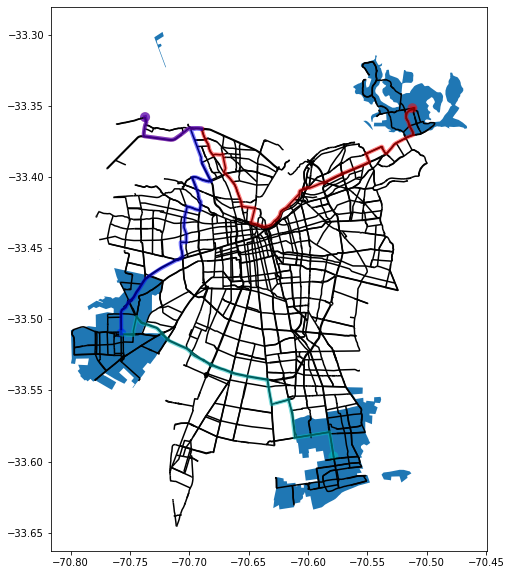

In [53]:
df_red_santiago = gpd.read_file('data/graph_shapefile/edges.shp')

cond1 = comunas_urbanas['x_centroide'] == mas_este
cond2 = comunas_urbanas['x_centroide'] == mas_oeste
cond3 = comunas_urbanas['y_centroide'] == mas_sur
cond4 = comunas_urbanas['y_centroide'] == mas_norte

ax = comunas_urbanas[(cond1 | cond2 | cond3 | cond4)].plot(figsize=(10, 10))
ax = df_red_santiago.plot(ax=ax, figsize=(10, 10), color="black")

rutas_finales = [rutas_distancias[2][0],rutas_distancias[3][0],rutas_distancias[4][0]]
fig, ax = ox.plot_graph_routes(red_santiago, rutas_finales, ax=ax, node_size = 0, figsize=(10,10), route_colors=["r", "c","b"])